<a href="https://colab.research.google.com/github/carbaluar/Presentaci-n/blob/main/CRR-impurezas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generamos el Archivo de Excel para la lectura

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3
import datetime

In [ ]:

dfAL = pd.read_excel('/content/DBRTO.xlsx')
dfAL.head()

,Timestamp,in CADC,out CADC,T FUB,T406,Velocidad M140,HAG,R
0,2020-11-03 09:00:00,206.673612,224.758101,195.818280,138.064697,8.898748,73.980766,0
1,2020-11-03 09:30:00,209.951967,225.060193,200.993333,144.010928,27.986787,156.013889,0
2,2020-11-03 10:00:00,212.247973,224.728009,207.600000,157.628570,28.104202,173.410031,1
3,2020-11-03 10:30:00,209.301215,224.422448,202.366667,162.052813,31.679949,187.017857,1
4,2020-11-03 11:00:00,207.480325,224.586800,197.988889,164.027985,32.133517,202.090097,1


In [ ]:
dfAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       3911 non-null   datetime64[ns]
 1   in CADC         3911 non-null   float64       
 2   out CADC        3911 non-null   float64       
 3   T FUB           3911 non-null   float64       
 4   T406            3911 non-null   float64       
 5   Velocidad M140  3911 non-null   float64       
 6   HAG             3911 non-null   float64       
 7   R               3911 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 244.6 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# divido entre train y test/validación en 70%/30%
dfAL_train, dfAL_test_validation = train_test_split(dfAL, train_size=0.7, stratify = dfAL["R"])

In [ ]:

# divido entre train y test/validación en 15% y 15%
dfAL_test, dfAL_validation = train_test_split(dfAL_test_validation, train_size=0.5, stratify = dfAL_test_validation["R"])

In [ ]:
dfAL_train.shape

(2737, 8)

In [ ]:
dfAL_test.shape

(587, 8)

In [ ]:
dfAL_validation.shape

(587, 8)

### Modelo Gaussiano

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB(priors=None, var_smoothing= 0.1)

In [ ]:
dfAL_train2 = dfAL_train[["out CADC","T FUB","HAG","R"]].copy()

In [ ]:
clf.fit(dfAL_train2.drop("R",axis=1), dfAL_train2["R"])

GaussianNB(priors=None, var_smoothing=0.1)

In [ ]:
clf.score(dfAL_train2.drop("R",axis=1), dfAL_train2["R"])

0.8257215929850201

In [ ]:
dfAL_validation2 = dfAL_validation[["out CADC","T FUB","HAG","R"]].copy()
dfAL_test_validation2 = dfAL_test_validation[["out CADC","T FUB","HAG","R"]].copy()

In [ ]:
clf.score(dfAL_validation2.drop("R",axis=1), dfAL_validation2["R"])


0.8057921635434412

In [ ]:
clf.score(dfAL_test_validation2.drop("R",axis=1), dfAL_test_validation2["R"])

0.8117546848381602

In [ ]:
BuscaSmoot = [0.1, 0.001, 0.0001, 0.00001, 0.000001, 0.000000000001]

In [ ]:
scores = list()
for busca in BuscaSmoot:
    clf = GaussianNB(var_smoothing = busca)
    clf.fit(dfAL_train2.drop("R",axis=1), dfAL_train2["R"])
    scores.append(clf.score(dfAL_validation2.drop("R",axis=1), dfAL_validation2["R"]))

print("Máximo score con un smoothing de: ", BuscaSmoot[scores.index(max(scores))], "--> valor de Score: ", max(scores))

Máximo score con un smoothing de:  0.1 --> valor de Score:  0.8057921635434412


Dato Obtenido

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np
dfAL_train2.head()

,out CADC,T FUB,HAG,R
457,220.892365,191.681644,200.322650,1
3861,210.665521,192.166667,230.505754,1
3449,213.087968,176.061798,214.664046,0
2974,205.642350,192.759259,214.645139,0
3532,221.430550,185.980000,215.235499,1


In [ ]:
clf.predict(np.array([[195,195,235]]))

array([0])

Matriz

In [ ]:
y_true = 1*np.array(dfAL_validation2["R"])

In [ ]:
y_true2 = 1*np.array(dfAL_test_validation2["R"])

In [ ]:
y_pred = clf.predict_proba(dfAL_validation2.drop("R",axis=1))

In [ ]:
y_pred2 = clf.predict_proba(dfAL_test_validation2.drop("R",axis=1))

In [ ]:
print("Matriz de Confusión Alfa 0.25")
print(confusion_matrix(y_true,y_pred[:,1]>0.25))

Matriz de Confusión Alfa 0.25
[[234  88]
 [ 26 239]]


In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
print("Valor de F1 para un alfa= 0.25 -->", fbeta_score(y_true, y_pred[:,1]>0.25, beta=1))

Valor de F1 para un alfa= 0.25 --> 0.8074324324324323


In [ ]:
print("Valor de Fbetascore para un alfa= 0.25 -->", fbeta_score(y_true, y_pred[:,1]>0.25, beta=2))

Valor de Fbetascore para un alfa= 0.25 --> 0.8615717375630858


In [ ]:
print("Matriz de Confusión Alfa 0.25")
print(confusion_matrix(y_true2,y_pred2[:,1]>0.25))

Matriz de Confusión Alfa 0.25
[[469 174]
 [ 53 478]]


In [ ]:
alfa = 0.02
recalls = np.zeros(100)
precisions= np.zeros(100)
FPR = np.zeros(100)
alfas = np.linspace(0,1,100)
for idx,alfa in enumerate(alfas):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred[:,1]>alfa).ravel()
    recalls[idx] = (tp/(tp+fn))
    precisions[idx] = (tp/(tp+fp))
    FPR[idx]= (fp/(fp+tn))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [ ]:
alfa = 0.02
recalls = np.zeros(100)
precisions= np.zeros(100)
FPR = np.zeros(100)
alfas = np.linspace(0,1,100)
for idx,alfa in enumerate(alfas):
    tn, fp, fn, tp = confusion_matrix(y_true2,y_pred2[:,1]>alfa).ravel()
    recalls[idx] = (tp/(tp+fn))
    precisions[idx] = (tp/(tp+fp))
    FPR[idx]= (fp/(fp+tn))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [ ]:
print("Para un alfa 0.25 --> Valor de recall", recalls[25], "Valor de Precisions", precisions[25], "Valor de FPR", FPR[25])
print("Para un alfa 0.5 --> Valor de recall", recalls[50], "Valor de Precisions", precisions[50], "Valor de FPR", FPR[50])
print("Para un alfa 0.75 --> Valor de recall", recalls[75], "Valor de Precisions", precisions[75], "Valor de FPR", FPR[75])

Para un alfa 0.25 --> Valor de recall 0.896421845574388 Valor de Precisions 0.7357032457496137 Valor de FPR 0.26594090202177295
Para un alfa 0.5 --> Valor de recall 0.7890772128060264 Valor de Precisions 0.7980952380952381 Valor de FPR 0.16485225505443235
Para un alfa 0.75 --> Valor de recall 0.7212806026365348 Valor de Precisions 0.8417582417582418 Valor de FPR 0.1119751166407465


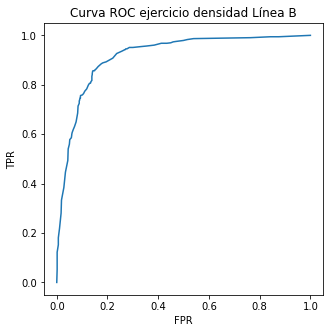

In [ ]:
plt.figure(figsize=[5,5])
plt.plot(FPR,recalls)
plt.title("Curva ROC ejercicio densidad Línea B")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

Modelo LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
LDA_clf = LinearDiscriminantAnalysis()

In [ ]:
LDA_clf.fit(dfAL_train2.drop("R",axis=1), dfAL_train2["R"])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
LDA_clf.score(dfAL_train2.drop("R",axis=1), dfAL_train2["R"])

0.8206065034709537

In [ ]:
LDA_clf.score(dfAL_validation2.drop("R",axis=1), dfAL_validation2["R"])

0.8705281090289608

In [ ]:
LDA_clf.predict(np.array([[220,195,235]]))

array([1])

In [ ]:
y_true2 = 1*np.array(dfAL_test_validation2["R"])

In [ ]:
y_pred_LDA = LDA_clf.predict_proba(dfAL_test_validation2.drop("R",axis=1))

In [ ]:
print("Matriz de Confusión Alfa 0.25")
print(confusion_matrix(y_true2,y_pred_LDA[:,1]>0.25))

Matriz de Confusión Alfa 0.25
[[481 162]
 [ 37 494]]


In [ ]:
alfa = 0.02
recalls = np.zeros(100)
precisions= np.zeros(100)
FPR = np.zeros(100)
alfas = np.linspace(0,1,100)
for idx,alfa in enumerate(alfas):
    tn, fp, fn, tp = confusion_matrix(y_true2,y_pred_LDA[:,1]>alfa).ravel()
    recalls[idx] = (tp/(tp+fn))
    precisions[idx] = (tp/(tp+fp))
    FPR[idx]= (fp/(fp+tn))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [ ]:
print("Para un alfa 0.25 --> Valor de recall", recalls[25], "Valor de Precisions", precisions[25], "Valor de FPR", FPR[25])
print("Para un alfa 0.5 --> Valor de recall", recalls[50], "Valor de Precisions", precisions[50], "Valor de FPR", FPR[50])
print("Para un alfa 0.75 --> Valor de recall", recalls[75], "Valor de Precisions", precisions[75], "Valor de FPR", FPR[75])

Para un alfa 0.25 --> Valor de recall 0.9265536723163842 Valor de Precisions 0.7557603686635944 Valor de FPR 0.24727838258164853
Para un alfa 0.5 --> Valor de recall 0.8267419962335216 Valor de Precisions 0.857421875 Valor de FPR 0.11353032659409021
Para un alfa 0.75 --> Valor de recall 0.7137476459510358 Valor de Precisions 0.8752886836027713 Valor de FPR 0.08398133748055987


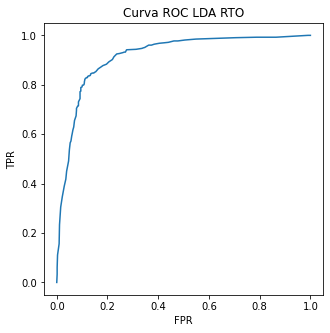

In [ ]:
plt.figure(figsize=[5,5])
plt.plot(FPR,recalls)
plt.title("Curva ROC LDA RTO")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

Modelo QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_clf = QuadraticDiscriminantAnalysis()

In [ ]:
QDA_clf.fit(dfAL_train2.drop("R",axis=1), dfAL_train2["R"])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
QDA_clf.score(dfAL_train2.drop("R",axis=1), dfAL_train2["R"])

0.8260869565217391

In [ ]:
QDA_clf.score(dfAL_validation2.drop("R",axis=1), dfAL_validation2["R"])

0.8654173764906303

In [ ]:
QDA_clf.predict(np.array([[220,195,230]]))

array([1])

In [ ]:
y_true2 = 1*np.array(dfAL_test_validation2["R"])

In [ ]:
y_pred_QDA = QDA_clf.predict_proba(dfAL_test_validation2.drop("R",axis=1))

Modelo de Regresión Log.

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression(C=1e9, verbose=1)

In [ ]:
LR_clf.fit(dfAL_train2.drop("R",axis=1), dfAL_train2["R"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
LR_clf.score(dfAL_train2.drop("R",axis=1), dfAL_train2["R"])

0.8217025940811107

In [ ]:
LR_clf.score(dfAL_validation2.drop("R",axis=1), dfAL_validation2["R"])

0.8671209540034072

In [ ]:
y_pred_LR = LR_clf.predict_proba(dfAL_test_validation2.drop("R",axis=1))

In [ ]:
print("Matriz de Confusión Alfa 0.25")
print(confusion_matrix(y_true2,y_pred_LR[:,1]>0.25))

Matriz de Confusión Alfa 0.25
[[434 209]
 [ 34 497]]


In [ ]:
alfa = 0.02
recalls = np.zeros(100)
precisions= np.zeros(100)
FPR = np.zeros(100)
alfas = np.linspace(0,1,100)
for idx,alfa in enumerate(alfas):
    tn, fp, fn, tp = confusion_matrix(y_true2,y_pred_LR[:,1]>alfa).ravel()
    recalls[idx] = (tp/(tp+fn))
    precisions[idx] = (tp/(tp+fp))
    FPR[idx]= (fp/(fp+tn))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [ ]:
print("Para un alfa 0.25 --> Valor de recall", recalls[25], "Valor de Precisions", precisions[25], "Valor de FPR", FPR[25])
print("Para un alfa 0.5 --> Valor de recall", recalls[50], "Valor de Precisions", precisions[50], "Valor de FPR", FPR[50])
print("Para un alfa 0.75 --> Valor de recall", recalls[75], "Valor de Precisions", precisions[75], "Valor de FPR", FPR[75])

Para un alfa 0.25 --> Valor de recall 0.935969868173258 Valor de Precisions 0.7039660056657224 Valor de FPR 0.3250388802488336
Para un alfa 0.5 --> Valor de recall 0.8097928436911488 Valor de Precisions 0.8582834331337326 Valor de FPR 0.1104199066874028
Para un alfa 0.75 --> Valor de recall 0.6120527306967984 Valor de Precisions 0.8904109589041096 Valor de FPR 0.06220839813374806


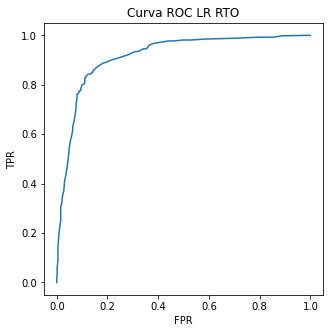

In [ ]:
plt.figure(figsize=[5,5])
plt.plot(FPR,recalls)
plt.title("Curva ROC LR RTO")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

Modelo de Redes Neuronales

In [ ]:
dfAL_train2.shape

(2737, 4)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
RN_clf= Sequential()
RN_clf.add(BatchNormalization(input_shape=(3,)))
RN_clf.add(Dense(16, input_dim=5, activation='relu'))
RN_clf.add(Dense(1, activation='sigmoid'))

In [ ]:
RN_clf.compile(loss='mean_squared_error',
              optimizer='SGD',
              metrics=['binary_accuracy'])

In [ ]:
RN_clf.fit(dfAL_train2.drop("R",axis=1), dfAL_train2["R"], epochs=300)

Epoch 1/300
86/86 [==============================] - 1s 1ms/step - loss: 0.2522 - binary_accuracy: 0.5525
Epoch 2/300
86/86 [==============================] - 0s 1ms/step - loss: 0.2309 - binary_accuracy: 0.5938
Epoch 3/300
86/86 [==============================] - 0s 1ms/step - loss: 0.2147 - binary_accuracy: 0.6771
Epoch 4/300
86/86 [==============================] - 0s 1ms/step - loss: 0.1977 - binary_accuracy: 0.7464
Epoch 5/300
86/86 [==============================] - 0s 1ms/step - loss: 0.1823 - binary_accuracy: 0.7809
Epoch 6/300
86/86 [==============================] - 0s 1ms/step - loss: 0.1697 - binary_accuracy: 0.7890
Epoch 7/300
86/86 [==============================] - 0s 1ms/step - loss: 0.1613 - binary_accuracy: 0.8173
Epoch 8/300
86/86 [==============================] - 0s 1ms/step - loss: 0.1555 - binary_accuracy: 0.8077
Epoch 9/300
86/86 [==============================] - 0s 1ms/step - loss: 0.1487 - binary_accuracy: 0.8149
Epoch 10/300
86/86 [==========================

In [ ]:
y_pred_RN = RN_clf.predict_proba(dfAL_test_validation2.drop("R",axis=1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
print("Matriz de Confusión Alfa 0.25")
print(confusion_matrix(y_true2,y_pred_RN[:,0]>0.25))

Matriz de Confusión Alfa 0.25
[[469 174]
 [ 34 497]]


In [ ]:
alfa = 0.02
recalls = np.zeros(100)
precisions= np.zeros(100)
FPR = np.zeros(100)
alfas = np.linspace(0,1,100)
for idx,alfa in enumerate(alfas):
    tn, fp, fn, tp = confusion_matrix(y_true2,y_pred_RN[:,0]>alfa).ravel()
    recalls[idx] = (tp/(tp+fn))
    precisions[idx] = (tp/(tp+fp))
    FPR[idx]= (fp/(fp+tn))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [ ]:
print("Para un alfa 0.25 --> Valor de recall", recalls[25], "Valor de Precisions", precisions[25], "Valor de FPR", FPR[25])
print("Para un alfa 0.5 --> Valor de recall", recalls[50], "Valor de Precisions", precisions[50], "Valor de FPR", FPR[50])
print("Para un alfa 0.75 --> Valor de recall", recalls[75], "Valor de Precisions", precisions[75], "Valor de FPR", FPR[75])

Para un alfa 0.25 --> Valor de recall 0.935969868173258 Valor de Precisions 0.7406855439642325 Valor de FPR 0.27060653188180406
Para un alfa 0.5 --> Valor de recall 0.8267419962335216 Valor de Precisions 0.857421875 Valor de FPR 0.11353032659409021
Para un alfa 0.75 --> Valor de recall 0.6534839924670434 Valor de Precisions 0.9060052219321149 Valor de FPR 0.05598755832037325


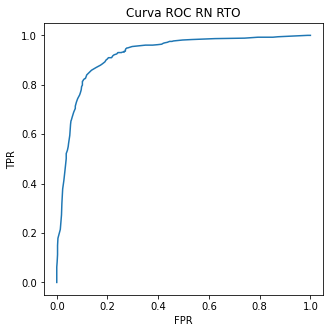

In [ ]:
plt.figure(figsize=[5,5])
plt.plot(FPR,recalls)
plt.title("Curva ROC RN RTO")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()